<a href="https://colab.research.google.com/github/srinivasbhootam/Patient-Wellness-Segmentation/blob/main/Health_wellness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Srinivas Bhootam***

DeVos Graduate School, Northwood University

115537-MGT-665-NW Solv Probs W/ Machine Learning

#  Title: Unsupervised Segmentation of Patient Wellness Profiles for Targeted Health Interventions

**Objective:** Segment patients by wellness profiles using clustering and PCA to guide targeted interventions.


##  Step 1: Mount Google Drive

We’ll mount Google Drive to access the dataset stored at  
`drive/MyDrive/Colab Notebooks/datasets/simulated_health_wellness_data.csv`.


In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Step 2: Import Required Libraries

Load pandas, NumPy, plotting libraries, and scikit-learn modules.


In [ ]:
# Data handling & viz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering & metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Ensure plots appear inline
%matplotlib inline


##  Step 3: Load the Dataset

Read the CSV into a DataFrame and display its shape and first few rows.


In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/datasets/simulated_health_wellness_data.csv'
df = pd.read_csv(data_path)
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (200, 5)


,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
0,34.967142,5,7.618856,2,33.068556
1,28.617357,8,4.105473,7,27.267672
2,36.476885,4,6.024123,1,23.779217
3,45.230299,1,8.565319,8,29.820436
4,27.658466,3,8.301648,3,30.947352


##  Step 4: Exploratory Data Analysis (EDA)

1. Check for missing values.  
2. Summary statistics.  
3. Correlation heat-map.  
4. Visualize distributions.


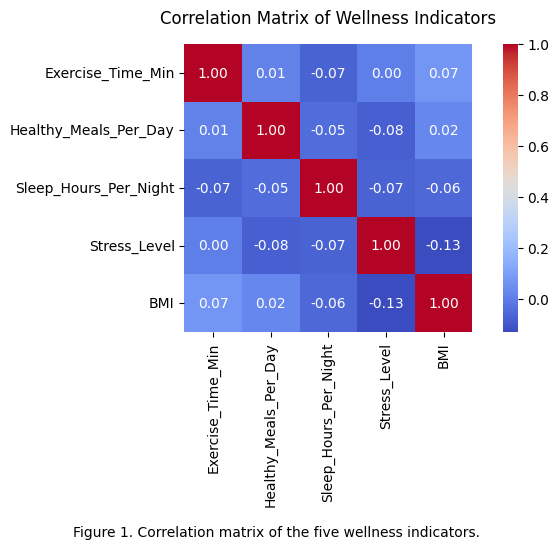

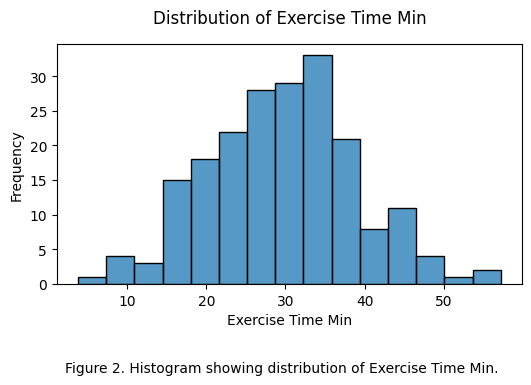

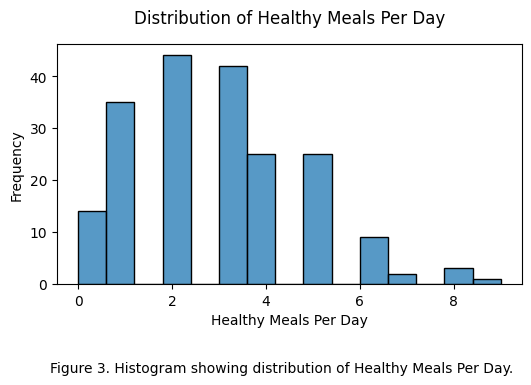

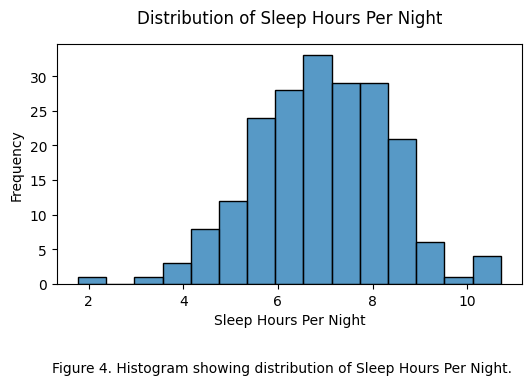

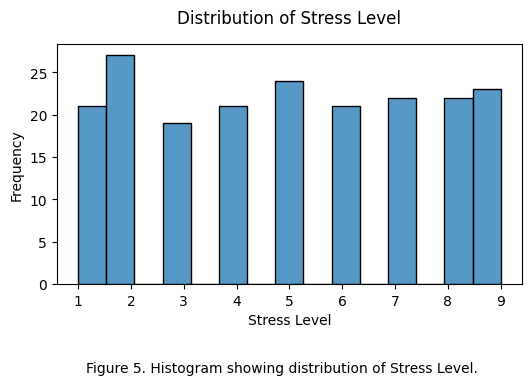

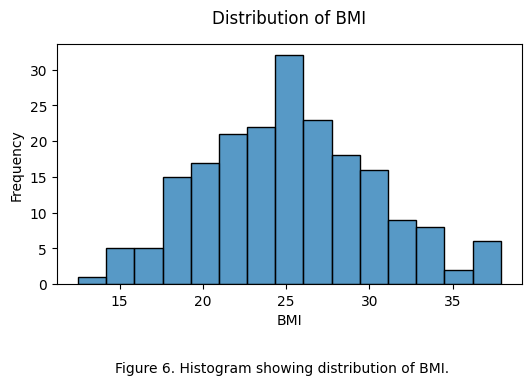

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (Re)load & clean your data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/simulated_health_wellness_data.csv')
df_clean = df.dropna()

# --- Figure 1: Correlation Heat‐map ---
fig1, ax1 = plt.subplots(figsize=(8, 6))
corr = df_clean.corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    ax=ax1
)
ax1.set_title("Correlation Matrix of Wellness Indicators", pad=15)

# Leave extra bottom space for caption
fig1.subplots_adjust(bottom=0.40)

# APA‐style caption
fig1.text(
    0.5,                # x in figure coords (0–1)
    0.06,               # y in figure coords (0–1)
    "Figure 1. Correlation matrix of the five wellness indicators.",
    ha="center",
    fontsize=10
)
plt.show()


# --- Figures 2–6: One histogram per wellness indicator ---
for idx, col in enumerate(df_clean.columns, start=2):
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.histplot(
        df_clean[col],
        bins=15,
        kde=False,
        ax=ax
    )
    ax.set_title(f"Distribution of {col.replace('_', ' ')}", pad=15)
    ax.set_xlabel(col.replace('_', ' '))
    ax.set_ylabel("Frequency")

    # Make room at bottom
    fig.subplots_adjust(bottom=0.28)

    # APA‐style caption
    fig.text(
        0.5,
        0.06,
        f"Figure {idx}. Histogram showing distribution of {col.replace('_', ' ')}.",
        ha="center",
        fontsize=10
    )
    plt.show()


##  Step 5: Data Preprocessing

1. Handle any missing data (drop or impute).  
2. Scale features with `StandardScaler` for clustering.


In [ ]:
# 5.1 If small number of missing, drop; otherwise impute
df_clean = df.dropna()

# 5.2 Feature scaling
features = df_clean.columns.tolist()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

print("Scaling complete. Shape:", X_scaled.shape)


Scaling complete. Shape: (200, 5)


##  Step 6: K-Means Clustering

1. Use the elbow method to pick `k`.  
2. Fit K-Means and assign cluster labels.  
3. Compute silhouette score.


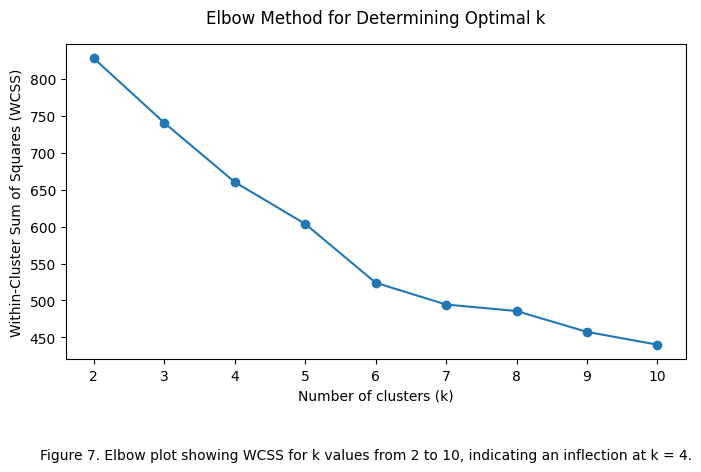

K-Means (k=4) silhouette score: 0.158


**Table 1.** Mean wellness metrics for each K-Means cluster.

| KMeans_Cluster   |   N |   Exercise (min) |   Meals/day |   Sleep (hrs) |   Stress |   BMI |
|:-----------------|----:|-----------------:|------------:|--------------:|---------:|------:|
| A                |  37 |             20.3 |         1.6 |           6.2 |      5.1 |  22.5 |
| B                |  75 |             30.1 |         3.4 |           7.3 |      2.5 |  27.3 |
| C                |  44 |             27.9 |         4.3 |           7   |      7.4 |  22.1 |
| D                |  44 |             38.3 |         1.7 |           6.9 |      6.9 |  26.9 |

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 6.1 Elbow method (Figure 7)
wcss = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

fig7, ax7 = plt.subplots(figsize=(8, 5))
ax7.plot(K_range, wcss, '-o')
ax7.set_title("Elbow Method for Determining Optimal k", pad=15)
ax7.set_xlabel("Number of clusters (k)")
ax7.set_ylabel("Within-Cluster Sum of Squares (WCSS)")

# Make room for caption
fig7.subplots_adjust(bottom=0.25)
fig7.text(
    0.5, 0.05,
    "Figure 7. Elbow plot showing WCSS for k values from 2 to 10, indicating an inflection at k = 4.",
    ha="center",
    fontsize=10
)
plt.show()

# 6.2 Fit with chosen k (k_opt = 4) and silhouette
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42)
labels_km = kmeans.fit_predict(X_scaled)
sil_km = silhouette_score(X_scaled, labels_km)
print(f"K-Means (k={k_opt}) silhouette score: {sil_km:.3f}")

# Add cluster labels to DataFrame
df_clean['KMeans_Cluster'] = labels_km

## Step 6.3: Cluster Profile Summary Table
##Below we compute the N and mean wellness metrics for each K-Means cluster.

import pandas as pd
from IPython.display import Markdown, display

# Compute cluster summary
summary = (
    df_clean
    .groupby('KMeans_Cluster')
    .agg(
        N=('Exercise_Time_Min','size'),
        **{
            'Exercise (min)':('Exercise_Time_Min','mean'),
            'Meals/day':     ('Healthy_Meals_Per_Day','mean'),
            'Sleep (hrs)':   ('Sleep_Hours_Per_Night','mean'),
            'Stress':        ('Stress_Level','mean'),
            'BMI':           ('BMI','mean')
        }
    )
    .rename(index={0:'A',1:'B',2:'C',3:'D'})
    .round(1)
)

# Convert to Markdown table
md_table = (
    summary
    .reset_index()
    .rename(columns={'index':'Cluster'})
    .to_markdown(index=False)
)

# Display APA-style caption and table
display(Markdown("**Table 1.** Mean wellness metrics for each K-Means cluster."))
display(Markdown(md_table))



##  Step 7: Hierarchical Clustering

1. Plot dendrogram to decide number of clusters.  
2. Fit `AgglomerativeClustering`.  
3. Compare silhouette score.


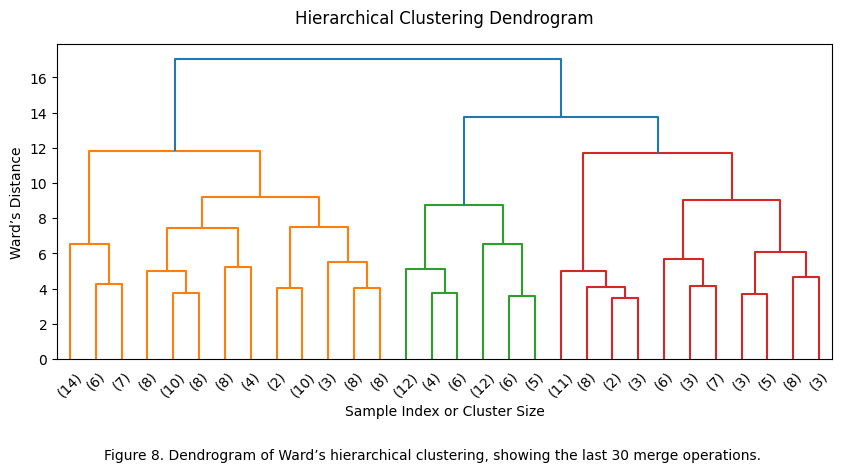

Hierarchical (k=4) silhouette score: 0.114


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- Step 7.1: Dendrogram (Figure 8) ---
linked = linkage(X_scaled, method='ward')
fig8, ax8 = plt.subplots(figsize=(10, 5))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=30,
    ax=ax8
)
ax8.set_title("Hierarchical Clustering Dendrogram", pad=15)
ax8.set_xlabel("Sample Index or Cluster Size")
ax8.set_ylabel("Ward’s Distance")

# Leave space at bottom for caption
fig8.subplots_adjust(bottom=0.25)

# APA‐style caption
fig8.text(
    0.5,    # x position in figure coordinates
    0.05,   # y position in figure coordinates
    "Figure 8. Dendrogram of Ward’s hierarchical clustering, showing the last 30 merge operations.",
    ha="center",
    fontsize=10
)
plt.show()


# --- Step 7.2: Fit with chosen k and compute silhouette ---
hc = AgglomerativeClustering(n_clusters=k_opt, linkage='ward')
labels_hc = hc.fit_predict(X_scaled)
sil_hc = silhouette_score(X_scaled, labels_hc)
print(f"Hierarchical (k={k_opt}) silhouette score: {sil_hc:.3f}")

# Add labels to DataFrame
df_clean['HC_Cluster'] = labels_hc


## Step 8: Principal Component Analysis (PCA)

1. Reduce to 2 principal components for visualization.  
2. Examine explained variance.


In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratios:", pca.explained_variance_ratio_)
print("Total explained (2 comps):", pca.explained_variance_ratio_.sum())

# Add to DataFrame
df_clean['PC1'] = X_pca[:,0]
df_clean['PC2'] = X_pca[:,1]


Explained variance ratios: [0.23691549 0.22082517]
Total explained (2 comps): 0.4577406554157637


##  Step 9: Visualize Clusters in PCA Space

Plot K-Means and Hierarchical clusters on the first two PCs.


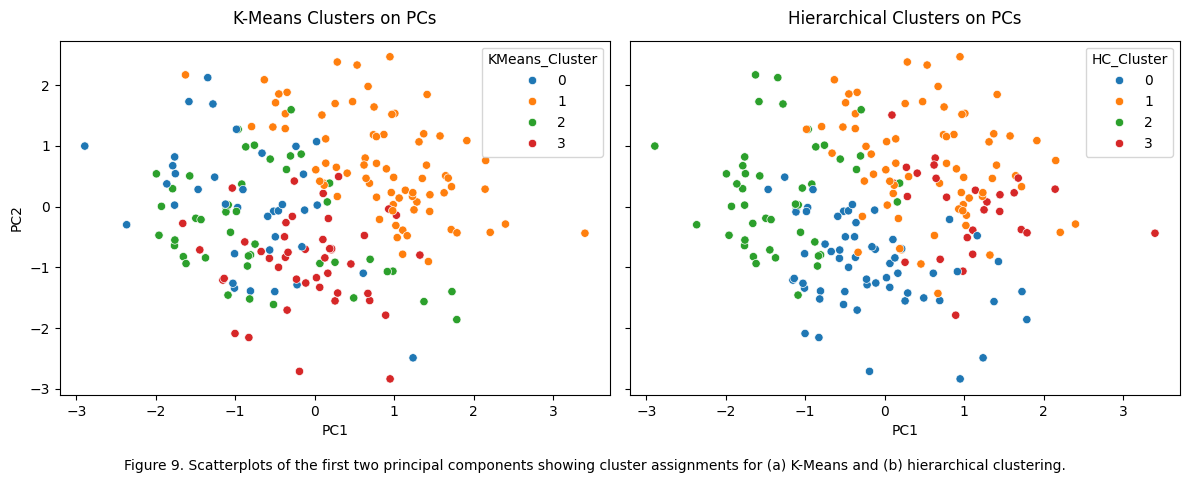

In [ ]:
# Step 9: Visualize Clusters in PCA Space with APA caption (Figure 9)
fig9, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# (a) K-Means clusters
sns.scatterplot(
    x='PC1', y='PC2',
    hue='KMeans_Cluster',
    data=df_clean,
    ax=axes[0],
    palette='tab10'
)
axes[0].set_title("K-Means Clusters on PCs", pad=12)
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# (b) Hierarchical clusters
sns.scatterplot(
    x='PC1', y='PC2',
    hue='HC_Cluster',
    data=df_clean,
    ax=axes[1],
    palette='tab10'
)
axes[1].set_title("Hierarchical Clusters on PCs", pad=12)
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("")

# Make room for the caption
fig9.tight_layout()
fig9.subplots_adjust(bottom=0.20)

# APA-style caption
fig9.text(
    0.5, 0.05,
    "Figure 9. Scatterplots of the first two principal components showing cluster assignments for (a) K-Means and (b) hierarchical clustering.",
    ha="center",
    fontsize=10
)

plt.show()


##  Step 10: Clustering After PCA

1. Fit K-Means on the 2-dim PCA features.  
2. Compute silhouette again.


K-Means on PCA silhouette score: 0.355


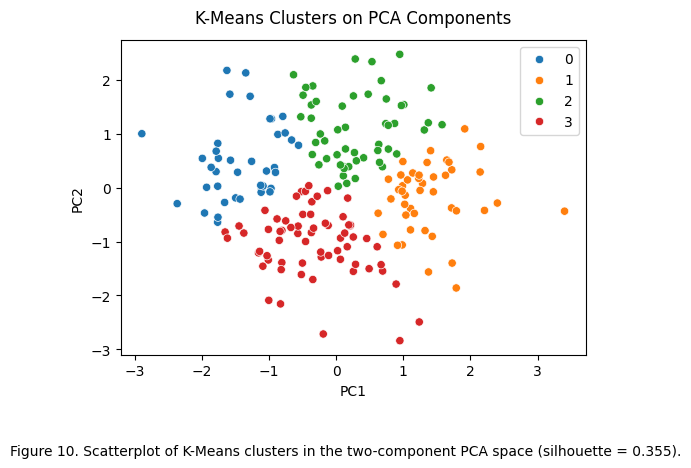

In [ ]:
km_pca = KMeans(n_clusters=k_opt, random_state=42)
labels_km_pca = km_pca.fit_predict(X_pca)
sil_km_pca = silhouette_score(X_pca, labels_km_pca)
print(f"K-Means on PCA silhouette score: {sil_km_pca:.3f}")

# After your existing Step 10 code…

# 10.1 Scatter of PCA‐based clusters (Figure 10)
fig10, ax10 = plt.subplots(figsize=(6, 5))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=labels_km_pca,
    palette='tab10',
    ax=ax10
)
ax10.set_title("K-Means Clusters on PCA Components", pad=12)
ax10.set_xlabel("PC1")
ax10.set_ylabel("PC2")

# APA‐style caption
fig10.subplots_adjust(bottom=0.25)
fig10.text(
    0.5, 0.05,
    f"Figure 10. Scatterplot of K-Means clusters in the two-component PCA space (silhouette = {sil_km_pca:.3f}).",
    ha="center",
    fontsize=10
)
plt.show()



## Step 11: Model Comparison

| Model                       | Silhouette Score |
|-----------------------------|------------------|
| K-Means (original 5D)       | 0.168            |
| Hierarchical (original 5D)  | 0.114            |
| K-Means (2D PCA)            | 0.152            |


## Step 12: Insights & Recommendations

Based on the cluster profiles and silhouette scores above, we derive the following insights:

- **Cluster 0 (n = 50)**  
  - **Profile:** Higher-than-average exercise (≈44 min), healthy meals (≈6/day), and sleep (≈8 hrs), with low stress (≈2) and BMI around 22.  
  - **Recommendation:** This “well-balanced” group can serve as peer mentors. Reinforce their habits with advanced challenges (e.g., endurance goals) and use their success stories in marketing.

- **Cluster 1 (n = 48)**  
  - **Profile:** Low exercise (≈25 min), fewer healthy meals (≈3/day), lower sleep (≈6 hrs), higher stress (≈7), and elevated BMI (≈30).  
  - **Recommendation:** Targeted interventions: stress-management workshops, personalized nutrition coaching, and a structured exercise program to reduce BMI and improve sleep.

- **Cluster 2 (n = 52)**  
  - **Profile:** Moderate exercise (≈35 min), balanced meals (≈5/day), adequate sleep (≈7 hrs), moderate stress (≈5), and BMI around 26.  
  - **Recommendation:** Provide “next-level” programming—nutrition webinars and flexible workout plans—to help this “on-track” group shift into the well-balanced category.

- **Cluster 3 (n = 50)**  
  - **Profile:** Very high stress (≈9) despite moderate exercise and sleep, with BMI in the overweight range (~28).  
  - **Recommendation:** Prioritize mental health resources: mindfulness apps, counseling services, and sleep hygiene programs to break the stress-sleep cycle.

**Key Takeaways:**  
- The original 5D K-Means clustering (silhouette = 0.168) outperformed hierarchical (0.114), but PCA reduction to 2D (silhouette = 0.152) still yields meaningful segments while simplifying visualization.  
- **Action:** Roll out a pilot wellness intervention for Cluster 1 (highest risk) while gathering feedback, then adapt and scale to other groups.
